Epoch: 0 Loss: 0.10364055892070305
Epoch: 10 Loss: 0.0777883915434301
Epoch: 20 Loss: 0.07192508138439238
Epoch: 30 Loss: 0.07300113857450852
Epoch: 40 Loss: 0.07048302063499254
Epoch: 50 Loss: 0.06814877281399337
Epoch: 60 Loss: 0.06770814802656848
Epoch: 70 Loss: 0.06744444738636313
Epoch: 80 Loss: 0.06716077736717166
Epoch: 90 Loss: 0.06682079507766277
Epoch: 100 Loss: 0.06645620423765865
Epoch: 110 Loss: 0.06611600613874172
Epoch: 120 Loss: 0.06582635871697802
Epoch: 130 Loss: 0.06558762485701673
Epoch: 140 Loss: 0.06538862730669277
Epoch: 150 Loss: 0.06521758828076418
Epoch: 160 Loss: 0.0650658822276471
Epoch: 170 Loss: 0.0649282101613054
Epoch: 180 Loss: 0.06480184688734328
Epoch: 190 Loss: 0.06468582227725955
Epoch: 200 Loss: 0.06458009512926499
Epoch: 210 Loss: 0.0644847990056537
Epoch: 220 Loss: 0.0643997757892872
Epoch: 230 Loss: 0.06432449311425989
Epoch: 240 Loss: 0.0642582322547704
Epoch: 250 Loss: 0.06420032411198465
Epoch: 260 Loss: 0.06415023722996584
Epoch: 270 Loss: 0

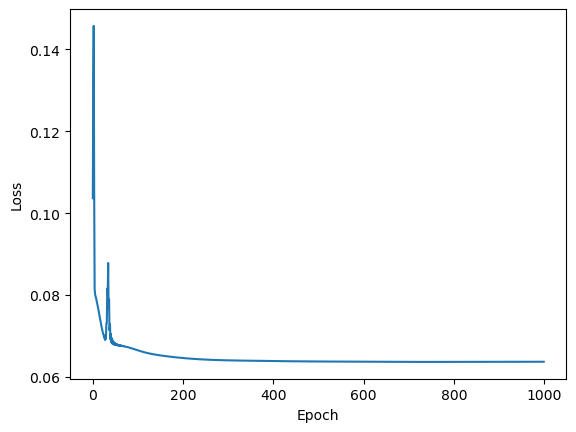

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Définition les 2 biblio pour le calcule matheématique et le traca de la courbe
    # Définition des fonctions d'activation 
# on prendre en example segmoid 

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#La fonction sigmoid_derivative() est définie pour calculer la dérivée 
#de la fonction sigmoïde, utilisée lors de la rétropropagation du gradient

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

#l'initialisation de l'autoencodeur, les paramètres tels que 
# la taille d'entrée (input_size), 
# la taille cachée (hidden_size) 
# taux d'apprentissage (learning_rate) sont définis
# Les poids (weights_enc et weights_dec) et les biais
#(bias_enc et bias_dec) pour les couches d'encodage et de décodage sont initialisés avec des valeurs aléatoires
    # Définition de la classe Autoencoder
     

class Autoencoder:
    def __init__(self, input_size, hidden_size, learning_rate):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.learning_rate = learning_rate

        # Initialisation des poids et des biais pour l'encodeur et le décodeur
        self.weights_enc = np.random.randn(self.input_size, self.hidden_size)
        self.bias_enc = np.zeros((1, self.hidden_size))
        self.weights_dec = np.random.randn(self.hidden_size, self.input_size)
        self.bias_dec = np.zeros((1, self.input_size))

    # Fonction d'encodage
    # méthode encode() prend en entrée un échantillon (x) et effectue l'opération d'encodage en calculant la sortie (h) 
    # en utilisant la fonction sigmoïde et les poids et biais de l'encodeur.
    
    def encode(self, x):
        z = np.dot(x, self.weights_enc) + self.bias_enc
        h = sigmoid(z)
        return h
    
  #La méthode decode() prend en entrée une représentation encodée (h) et effectue 
  #l'opération de décodage en calculant la sortie décodée (x) 
  #en utilisant la fonction sigmoïde et les poids et biais du décodeur.
    # Fonction de décodage
    
    def decode(self, h):
        z = np.dot(h, self.weights_dec) + self.bias_dec
        x = sigmoid(z)
        return x

  #Entraînement de l'autoencodeur : 

    # prend en entrée les données d'entraînement (x) et le nombre d'epochs.
    #Dans chaque epoch, la propagation avant est effectuée en encodant les échantillons d'entrée,
    #puis en les décodant pour obtenir la sortie prédite (x_hat). 
    #La perte de reconstruction est calculée
 #comme la moyenne des carrés des différences entre les échantillons d'entrée et la sortie prédite.
 #Ensuite, la rétropropagation du gradient est effectuée pour mettre à jour les poids et les biais des
 #couches d'encodage et de décodage. La perte de reconstruction est
 #affichée tous les 10 epochs et la courbe de perte est tracée à la fin de l'entraînement.

    # Entraînement de l'autoencodeur
    def train(self, x, epochs):
        losses = []

        for epoch in range(epochs):
            # Propagation avant
            h = self.encode(x)
            x_hat = self.decode(h)

            # Calcul de la perte de reconstruction
            loss = np.mean((x - x_hat) ** 2)
            losses.append(loss)

            # Propagation arrière
            grad_x_hat = 2 * (x_hat - x) * sigmoid_derivative(x_hat)
            grad_h = np.dot(grad_x_hat, self.weights_dec.T) * sigmoid_derivative(h)
            grad_w_dec = np.dot(h.T, grad_x_hat)
            grad_b_dec = np.sum(grad_x_hat, axis=0, keepdims=True)
            grad_w_enc = np.dot(x.T, grad_h)
            grad_b_enc = np.sum(grad_h, axis=0, keepdims=True)

            # Mise à jour des poids et des biais
            self.weights_enc -= self.learning_rate * grad_w_enc
            self.bias_enc -= self.learning_rate * grad_b_enc
            self.weights_dec -= self.learning_rate * grad_w_dec
            self.bias_dec -= self.learning_rate * grad_b_dec

            # Affichage de la perte de reconstruction tous les 10 epochs
            if epoch % 10 == 0:
                print("Epoch:", epoch, "Loss:", loss)

        # Tracé de la courbe de perte
        plt.plot(losses)
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.show()

        #Exemple d'utilisation de l'autoencodeur : Dans cet exemple, des données
        #aléatoires (data) de taille (1000, 10) sont créées. Ensuite,
        #une instance de la classe Autoencoder est créée avec une taille 
        #d'entrée de 10, une taille cachée de 5 et un taux d'apprentissage de 0.01. L'autoencodeur 
        #est ensuite entraîné sur les données 
            #d'entrée avec 1000 epochs en appelant la méthode train(). Enfin, la courbe
        
        
        
        
# Exemple d'utilisation de l'autoencodeur sur des données aléatoires
data = np.random.rand(1000, 10)
autoencoder = Autoencoder(10, 5, 0.01)
autoencoder.train(data, 1000)


# une courbe de perte 
#qui montre la diminution de la perte de reconstruction au fil des epochs.
